In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# **Data Preproccessing**

In [ ]:
#from google.colab import files
#data1 = files.upload()
#data2 = files.upload()
#data3 = files.upload()
#data4 = files.upload()

In [ ]:
df1=pd.read_csv('combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1],nrows=50000)
#df2=pd.read_csv('combined_data_2.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
#df3=pd.read_csv('combined_data_3.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
#df4=pd.read_csv('combined_data_4.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
df1['Rating'] = df1['Rating'].astype(float)
#df2['Rating'] = df2['Rating'].astype(float)
#df3['Rating'] = df3['Rating'].astype(float)
#df4['Rating'] = df4['Rating'].astype(float)

df = df1
#df = df1.append(df2)
#df = df.append(df3)
#df = df.append(df4)

df.index = np.arange(0,len(df))
print('Full dataset shape: {}'.format(df.shape))

Full dataset shape: (50000, 2)


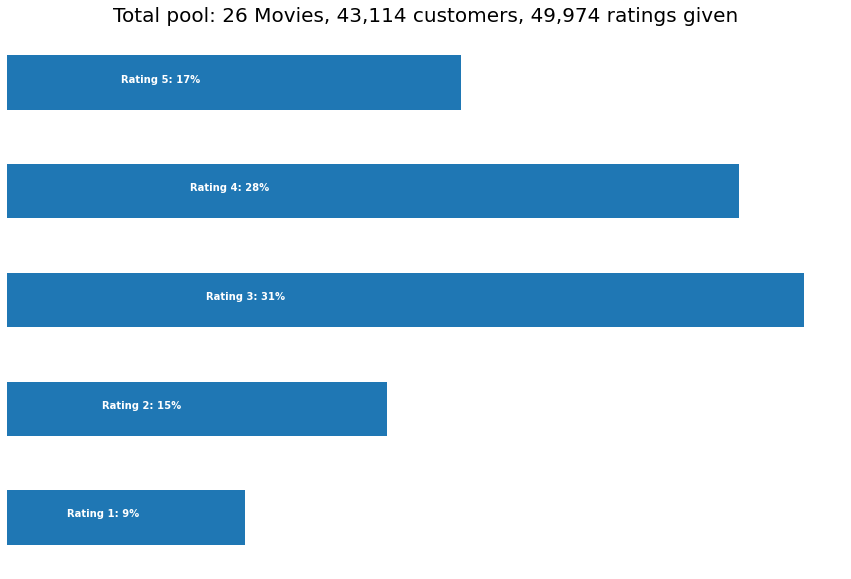

In [ ]:
p=df.groupby('Rating')['Rating'].agg(['count'])
movie_count = df.isnull().sum()[1]
cust_count = df['Cust_Id'].nunique() - movie_count
rating_count = df['Cust_Id'].count() - movie_count

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

In [ ]:
df_nan = pd.DataFrame(pd.isnull(df.Rating))
df_nan = df_nan[df_nan['Rating'] == True]
df_nan = df_nan.reset_index()

movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

last_record = np.full((1,len(df) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print('Movie numpy: {}'.format(movie_np))
print('Length: {}'.format(len(movie_np)))

Movie numpy: [ 1.  1.  1. ... 26. 26. 26.]
Length: 49974


In [ ]:
df = df[pd.notnull(df['Rating'])]
df['Movie_Id'] = movie_np.astype(int)
df['Cust_Id'] = df['Cust_Id'].astype(int)
print('-Dataset examples-')
print(df.iloc[::50000, :])

-Dataset examples-
   Cust_Id  Rating  Movie_Id
1  1488844     3.0         1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
f = ['count','mean']

df_movie_summary = df.groupby('Movie_Id')['Rating'].agg(f)
df_movie_summary.index = df_movie_summary.index.map(int)
movie_benchmark = round(df_movie_summary['count'].quantile(0.7),0)
drop_movie_list = df_movie_summary[df_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

df_cust_summary = df.groupby('Cust_Id')['Rating'].agg(f)
df_cust_summary.index = df_cust_summary.index.map(int)
cust_benchmark = round(df_cust_summary['count'].quantile(0.7),0)
drop_cust_list = df_cust_summary[df_cust_summary['count'] < cust_benchmark].index

print('Customer minimum times of review: {}'.format(cust_benchmark))

Movie minimum times of review: 1174.0
Customer minimum times of review: 1.0


In [ ]:
print('Original Shape: {}'.format(df.shape))
df = df[~df['Movie_Id'].isin(drop_movie_list)]
df = df[~df['Cust_Id'].isin(drop_cust_list)]
print('After Trim Shape: {}'.format(df.shape))

Original Shape: (49974, 3)
After Trim Shape: (43576, 3)


In [ ]:
df_p = pd.pivot_table(df,values='Rating',index='Cust_Id',columns='Movie_Id')

print(df_p.shape)
print(df_p)

(38786, 8)
Movie_Id  3    8   16   17   18  24  25   26
Cust_Id                                     
7        NaN  5.0 NaN  NaN  NaN NaN NaN  NaN
307      NaN  3.0 NaN  NaN  NaN NaN NaN  NaN
424      NaN  NaN NaN  NaN  4.0 NaN NaN  NaN
462      NaN  NaN NaN  2.0  NaN NaN NaN  NaN
491      NaN  NaN NaN  3.0  NaN NaN NaN  NaN
...       ..  ...  ..  ...  ...  ..  ..  ...
2649067  NaN  NaN NaN  NaN  NaN NaN NaN  3.0
2649093  NaN  NaN NaN  2.0  NaN NaN NaN  NaN
2649308  NaN  NaN NaN  NaN  4.0 NaN NaN  NaN
2649336  NaN  4.0 NaN  NaN  NaN NaN NaN  NaN
2649426  NaN  NaN NaN  4.0  NaN NaN NaN  NaN

[38786 rows x 8 columns]


In [ ]:
df_title = pd.read_csv('movie_titles.csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])
df_title.set_index('Movie_Id', inplace = True)
print(df_title.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


# **Singular Value Thresholding**

In [ ]:
def svd_solver(A,mask,t=None,delta=None,epsilon=1e-2,max_iterations=1000):
  Y=np.zeros_like(A)

  #initialize the step
  if not t:
    t=5*np.sum(A.shape)/2
  if not delta:
    delta=1.2*np.prod(A.shape)/np.sum(mask)

  for i in range(max_iterations):
    #SVD decomposition
    U,S,V=np.linalg.svd(Y,full_matrices=False)
    #soft-thresholding operator
    S=np.maximum(S-t,0)
    #singular value shrinkage
    X=np.linalg.multi_dot([U,np.diag(S),V])
    #interation of Y
    Y+=delta*mask*(A-X)
    #error calculation
    error=np.linalg.norm(mask*(X-A))/np.linalg.norm(mask*A)
    if error<epsilon:
      break
  return X

In [ ]:
df_p = df_p.fillna(0)
matrix=df_p.values
matrix=matrix.astype(float)
print(matrix)
import xlwt
import xlrd
filename =xlwt.Workbook()
sheet1 = filename.add_sheet(u'sheet1',cell_overwrite_ok=True)
[h,l]=matrix.shape #h为行数，l为列数
for i in range (h):
    for j in range (l):
      sheet1.write(i,j,matrix[i,j])
filename.save('name_of_your_excel_file.xls')


[[0. 5. 0. ... 0. 0. 0.]
 [0. 3. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 4. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
shape=matrix.shape
mask=np.zeros(shape)
for i in range(0,shape[0]):
  for j in range(0,shape[1]):
    if matrix[i,j]>0:
      mask[i,j]=1

In [ ]:
result=svd_solver(matrix,mask)
print(np.linalg.norm(result,'nuc'))
#2s

1786.2433405172205


In [ ]:
def new_rating(original,result,user):
  ratings=[]
  for i in range(original.shape[1]):
    r=original[user,i]
    if r==0:
      ratings.append((i,result[user,i]))
  return sorted(ratings,key=lambda x:x[1],reverse=True)

In [ ]:
print(new_rating(matrix,result,3))

[(1, 0.990558300219489), (4, 0.79489995310139), (0, 0.6349629309307758), (6, 0.5481067611672141), (2, 0.5134589576355583), (5, 0.3188596854479476), (7, 0.30880848946459394)]


# **Augmented Lagrange Multiplier**


In [ ]:
from numpy.linalg import norm, svd

In [ ]:
def inexact_augmented_lagrange_multiplier(X, lmbda=.01, tol=1e-2,
                                          maxiter=1000, verbose=True):
    """
    Inexact Augmented Lagrange Multiplier
    """
    Y = X
    norm_two = norm(Y.ravel(), 2)
    norm_inf = norm(Y.ravel(), np.inf) / lmbda
    dual_norm = np.max([norm_two, norm_inf])
    Y = Y / dual_norm
    A = np.zeros(Y.shape)
    E = np.zeros(Y.shape)
    dnorm = norm(X, 'fro')
    mu = 1.25 / norm_two
    rho = 1.5
    sv = 10.
    n = Y.shape[0]
    itr = 0
    while True:
        Eraw = X - A + (1 / mu) * Y
        Eupdate = np.maximum(Eraw - lmbda / mu, 0) + np.minimum(Eraw + lmbda / mu, 0)
        U, S, V = svd(X - Eupdate + (1 / mu) * Y, full_matrices=False)
        svp = (S > 1 / mu).shape[0]
        if svp < sv:
            sv = np.min([svp + 1, n])
        else:
            sv = np.min([svp + round(.05 * n), n])
        Aupdate = np.dot(np.dot(U[:, :svp], np.diag(S[:svp] - 1 / mu)), V[:svp, :])
        A = Aupdate
        E = Eupdate
        Z = X - A - E
        Y = Y + mu * Z
        mu = np.min([mu * rho, mu * 1e7])
        itr += 1
        if ((norm(Z, 'fro') / dnorm) < tol) or (itr >= maxiter):
            break
    if verbose:
        print("Finished at iteration %d" % (itr))  
    return A, E

In [ ]:
A, E = inexact_augmented_lagrange_multiplier(matrix)
print(np.linalg.norm(A,'nuc'))

Finished at iteration 13
261.7966431526168


In [ ]:
print(new_rating(matrix,A,3))

[(6, 0.022150034340126593), (1, 3.2312078256550184e-05), (4, -1.464050864809486e-06), (7, -0.0003564667500847378), (2, -0.0008275832155703987), (0, -0.002792118429770598), (5, -0.005188582510965167)]


# **Dual Method**
Translated from Matlab

In [ ]:
def choosvd(n,d):
  if n <= 100: 
    if d / n <= 0.02:
        y = 1
    else:
        y = 0

  elif n <= 200:
    if d / n <= 0.10:
        y = 1
    else:
        y = 0

  elif n <= 300:
    if d / n <= 0.13:
        y = 1
    else:
        y = 0

  elif n <= 400:
    if d / n <= 0.14:
        y = 1
    else:
        y = 0

  elif n <= 500:
    if d / n <= 0.17:
        y = 1
    else:
        y = 0

  else:
    if d / n <= 0.19:
        y = 1
    else:
        y = 0


In [ ]:
import statistics
import scipy as sp
def dual_rpca(D, maxIter=100, LineSearchFlag=0):
  m,n=D.shape
  lambda_=1/np.sqrt(m)
  tol=(2e-5)*(np.linalg.norm(D,'fro'))

  Y=np.sign(D)
  norm_two=np.linalg.svd(Y)
  norm_inf=np.linalg.norm(Y.flatten(),np.inf)/lambda_
  dual_norm = max(norm_two, norm_inf)
  Y = Y / dual_norm
  norm_two = norm_two / dual_norm
  norm_inf = norm_inf / dual_norm
  obj_v = (D.flatten).T * Y.flatten

  A_dual = np.zeros(m, n)
  E_dual = np.zeros(m, n)
  eps=1e-4
  tolProj = (1e-8) * (np.linalg.norm(D,'fro'))
  epsProjection = 1e-1
  t = 1

  delta = 0.1
  K = 7
  memoStepsize = np.ones(1,K) * 0.1
  beta = 0.6

  iter=0
  converged=False

  while not converged:
    iter+=1
    if norm_two<norm_inf-eps and iter<maxIter:
      threshold=np.linalg.norm(Y.flatten(),np.inf)*(1-epsProjection)
      Z=max(D*(Y>threshold),0)+min(D*(Y<-threshold),0)
    else:
      t=max(round(t*1.1),t+1)
      if choosvd(n,t)==1:
        u,s,v=sp.sparse.svds(Y,k=t,which='LM')
      else:
        u,s,v=np.linalg.svd(Y,full_matrices=0)
      
      ds=np.diag(s)
      t=max(np.where(ds<=ds[0]*(1-(1e-2))))

      if norm_two>norm_inf+eps and iter<maxIter:
        D_bar=(u[:,0:t]).T*D*(v.T)[:,0:t]
        S,J=np.linalg.eig((D_bar+D_bar.T)/2)
        temp=S*max(J,0)*(S.T)
        Z=u[:,0:t]*temp*v[:,0:t]

      else:
        convergedProjection = False;
        A_dual = np.zeros(m, n)
        E_dual = np.zeros(m, n)
        proj = 0
        threshold=np.linalg.norm(Y.flatten(),np.inf)*(1-epsProjection)
        while not convergedProjection:
          Z=D-A_dual
          Z=max(Z*(Y>threshold),0)+min(Z*(Y<-threshold),0)
          D_bar=(u[:,0:t]).T*(D-Z)*(v.T)[:,0:t]
          S,J=np.linalg.eig((D_bar+D_bar.T)/2)
          temp=S*max(J,0)*(S.T)
          X=(u[:,0:t]).T*temp*v[:,0:t]

          if np.linalg.norm(D-E_dual,'fro')<tolProj and np.linalg.norm(D-A_dual,'fro')<tolProj:
            convergedProjection=True
            E_dual=Z
            A_dual=X
            Z+=X
          else:
            E_dual=Z
            A_dual=X
          
          proj+=1
          if proj>50:
            convergedProjection=True
          
    Z=D-Z
    a=D.flatten().T*Y.flatten()
    b=D.flatten().T*Z.flatten()
    c=Z.flatten().T*Z.flatten()
    stepsize = max( 1.3 * statistics.median(memoStepsize), 1e-4 )
    convergedLineSearchLike = 0
    numTrialPoint=0
    while not convergedLineSearchLike:
      X = Y + stepsize * Z;
      norm_two = np.linalg.svd(X);
      norm_inf = np.linalg.norm(X.flatten(),np.inf) / lambda_
      dual_norm = max(norm_two, norm_inf)
      tempv = (a + b * stepsize) / dual_norm
      diff = tempv - a - stepsize / 2 * c
      if diff > 0 or numTrialPoint >= 50:
        convergedLineSearchLike = 1
        obj_v = tempv
        norm_two = norm_two / dual_norm
        norm_inf = norm_inf / dual_norm
        Y = X / dual_norm
        delta = stepsize
      else:
        stepsize = stepsize * beta
      
      numTrialPoint = numTrialPoint + 1
       
    memoStepsize[0,iter%K] = delta

    stopCriterion=np.linalg.norm(D-A_dual-E_dual,'fro')
    if stopCriterion<tol:
      converged=True

    if iter%10==0:
      print('temp finished')
        
    if not converged and iter>=maxIter:
      print('Max iter reached')
      return A_dual
      converged=1


In [ ]:
print(dual_rpca(matrix))

NameError: ignored